In [38]:
#load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
import seaborn as sns

In [39]:
#import the data
data = pd.read_csv("heart_failure.csv")
pd.set_option('display.max_columns', None)

### Exploratory data analysis EDA

In [40]:
#data exploration
data.head()
data.info()
#data.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [41]:
#convert columns with  0,1 data into categorical data

data.anaemia = data.anaemia.astype("category")
data.diabetes = data.diabetes.astype("category")
data.high_blood_pressure = data.high_blood_pressure.astype("category")
data.sex = data.sex.astype("category")
data.smoking = data.smoking.astype("category")
data.DEATH_EVENT = data.DEATH_EVENT.astype("category")

In [42]:
import os
#if there is not table_report.txt file, create it
if not os.path.exists("table_report.txt"):
    with open("table_report.txt", "w") as report:
        report.write("Table Report for Heart Failure Dataset\n")
        report.write("=" * 40 + "\n\n")
        
        # Dataset shape
        report.write(f"Number of Rows: {data.shape[0]}\n")
        report.write(f"Number of Columns: {data.shape[1]}\n\n")
        
        # Column names
        report.write("Column Names:\n")
        for col in data.columns:
            report.write(f"- {col}\n")
        
        # Data types
        report.write("\nData Types:\n")
        report.write(data.dtypes.to_string())
        
        # Missing values
        report.write("\n\nMissing Values:\n")
        missing = data.isnull().sum()
        if missing.sum() == 0:
            report.write("There are no missing values in the dataset.\n")
        else:
            for col, count in missing.items():
                if count > 0:
                    report.write(f"{col}: {count} missing values\n")
    
        print(f"Report saved to: {report}")

In [43]:
# Check for duplicates

with open("table_report.txt", "a") as report:
    report.write("\n\nDuplicate Rows:\n")
    duplicate_count = data.duplicated().sum()
    if duplicate_count > 0:
        report.write(f"There are {duplicate_count} duplicate rows in the dataset.\n")
    else:
        report.write("There are no duplicate rows in the dataset.\n")

In [44]:
data.info()
#data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(3), int64(4)
memory usage:

In [45]:
# Identify the outliers using the IQR method, but apply only for numerical columns
# Filter numerical columns with float64 and int64 types
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns

# Calculate IQR for numerical columns
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1



# Identify outliers in numerical columns
threshold = 3

outliers = data[((data[numerical_columns] < (Q1 - threshold * IQR)) | (data[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)]
if not outliers.empty:
    print(f"Number of outliers detected: {len(outliers)}")
    print("Outliers:")
    print(outliers)

#remove the outliers from the data
data_cleaned = data[~((data[numerical_columns] < (Q1 - threshold * IQR)) | (data[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)]

with open("table_report.txt", "a") as report:
    report.write("\n\nOutliers Report:\n")

    report.write("There are 37 outliers in the datasets when I use the threshold of 3.\n")

Number of outliers detected: 37
Outliers:
      age anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
1    55.0       0                      7861        0                 38   
9    80.0       1                       123        0                 35   
10   75.0       1                        81        0                 38   
28   58.0       1                        60        0                 38   
31   85.0       0                        23        0                 45   
35   69.0       0                       582        1                 35   
38   60.0       0                      2656        1                 30   
39   60.0       0                       235        1                 38   
48   80.0       1                       553        0                 20   
52   60.0       0                      3964        1                 62   
60   45.0       0                      7702        1                 25   
65   60.0       0                        68        0      

#### Univariate Analysis
We'll look at distributions of numerical variables and frequency of categorical variables.

<Figure size 1800x1200 with 0 Axes>

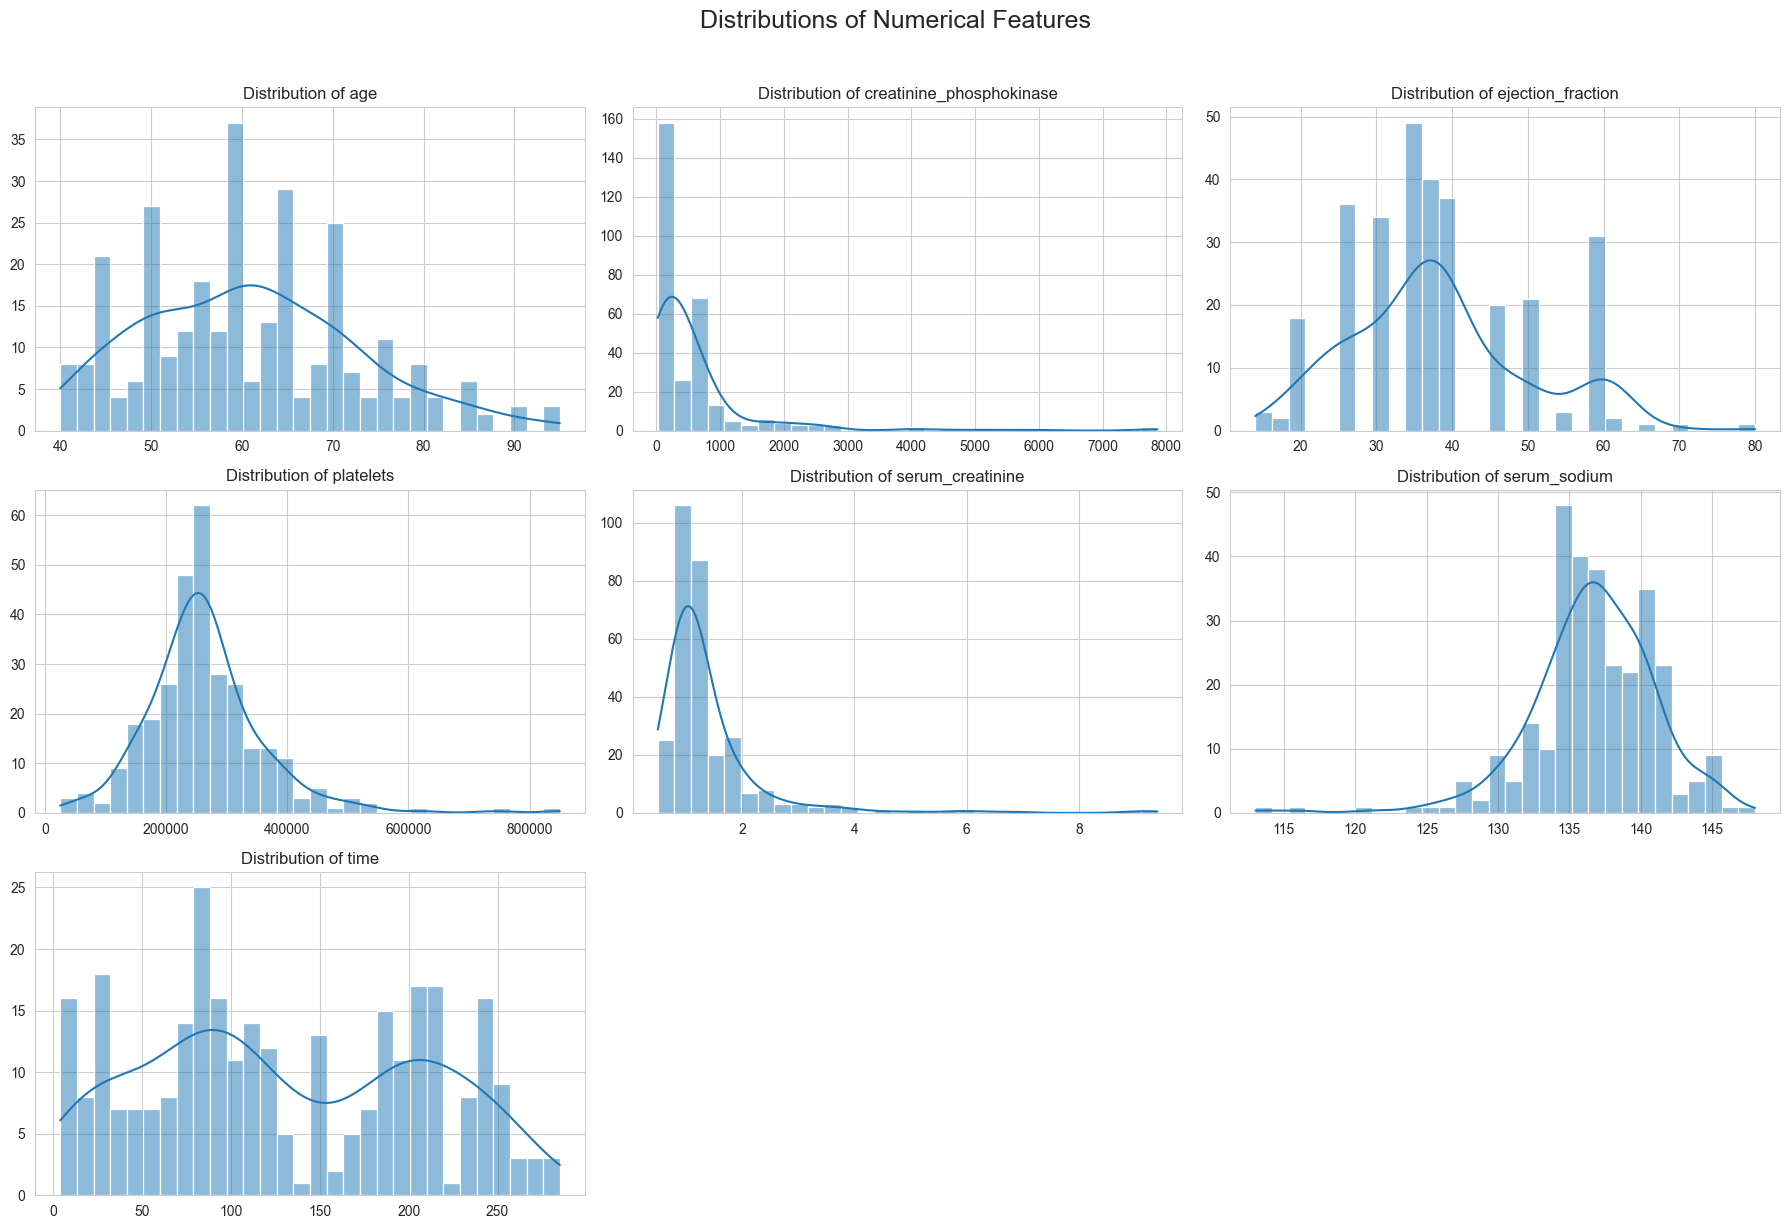

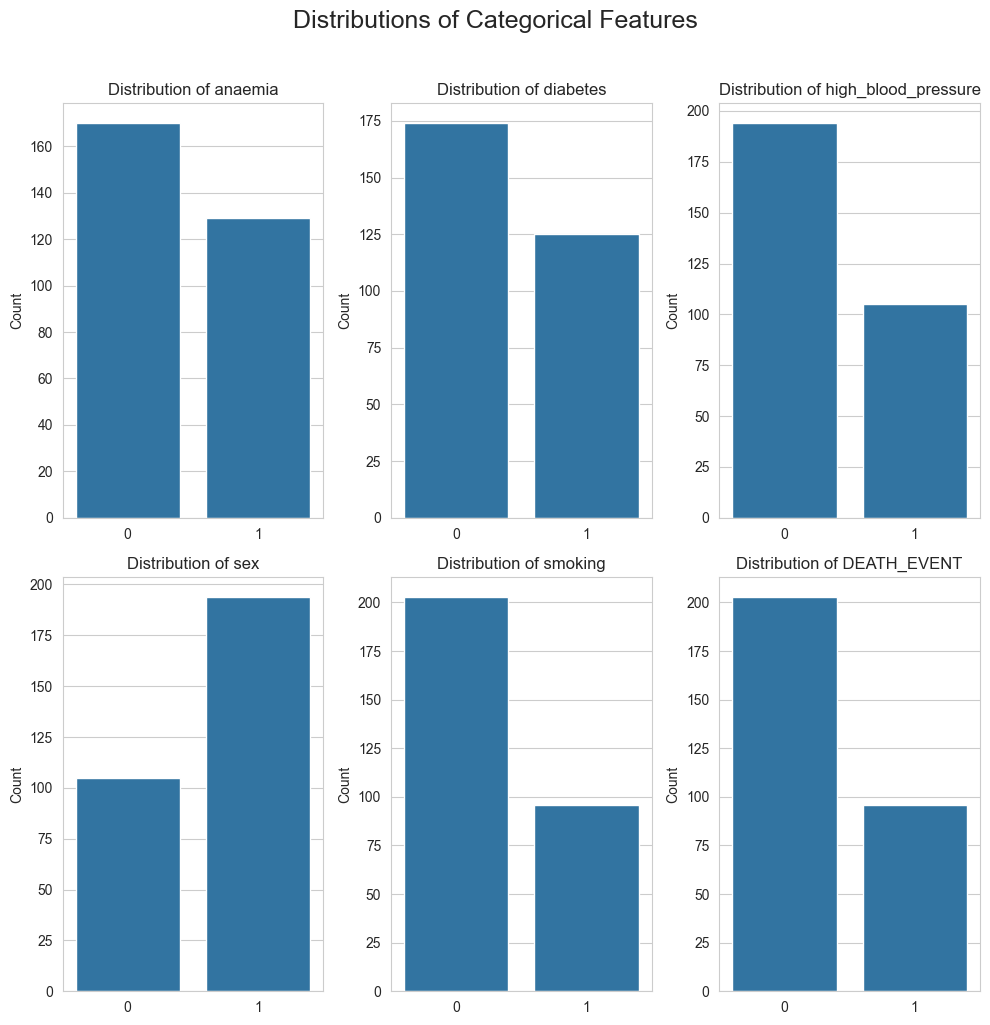

In [53]:
#plot the distributions of numerical and categorical features ans# save the plots in the folder plots
output_folder = "plots"
numerical = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 12))  # Adjust figure size as needed

# Create a 3x3 grid (only 7 used)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Convert 2D array of axes to 1D

for i, col in enumerate(numerical):
    sns.histplot(data[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide unused subplots (positions 7 and 8 in the grid)
for j in range(len(numerical), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distributions of Numerical Features", fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "numerical_distributions.png"))
plt.show()


categorical = data.select_dtypes(include="category").columns.tolist()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
axes = axes.flatten()  # Convert 2D array of axes to 1D
for i, col in enumerate(categorical):
    sns.countplot(x = col, data = data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel("Count")
# Hide any unused subplots (if < 6 categorical columns)
for j in range(len(categorical), len(axes)):
    fig.delaxes(axes[j])
fig.suptitle("Distributions of Categorical Features", fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "categorical_distributions.png"))
plt.show()
#

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']


DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


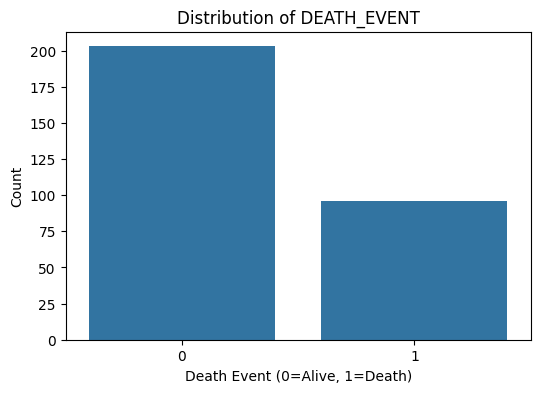


Death Event Distribution:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


In [10]:
# what is the distibution of the death event in the dataset?

death_event_distribution = data["DEATH_EVENT"].value_counts()
print(death_event_distribution)

with open("table_report.txt", "a") as report:
    report.write("\n\nDeath Event Distribution:\n")
    report.write(f"\n{death_event_distribution.to_string()}\n")
    report.write("There is uneven distribution of the death event in the dataset.\n")


death_counts = data['DEATH_EVENT'].value_counts()
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=data)
plt.title("Distribution of DEATH_EVENT")
plt.xlabel("Death Event (0=Alive, 1=Death)")
plt.ylabel("Count")
plt.show()
print("\nDeath Event Distribution:")
print(death_counts)

- we see here a class imblalance, since there are 203 patients who survived and 96 died during follow-up. This can influence later the model performance. 

### Correlation analysis

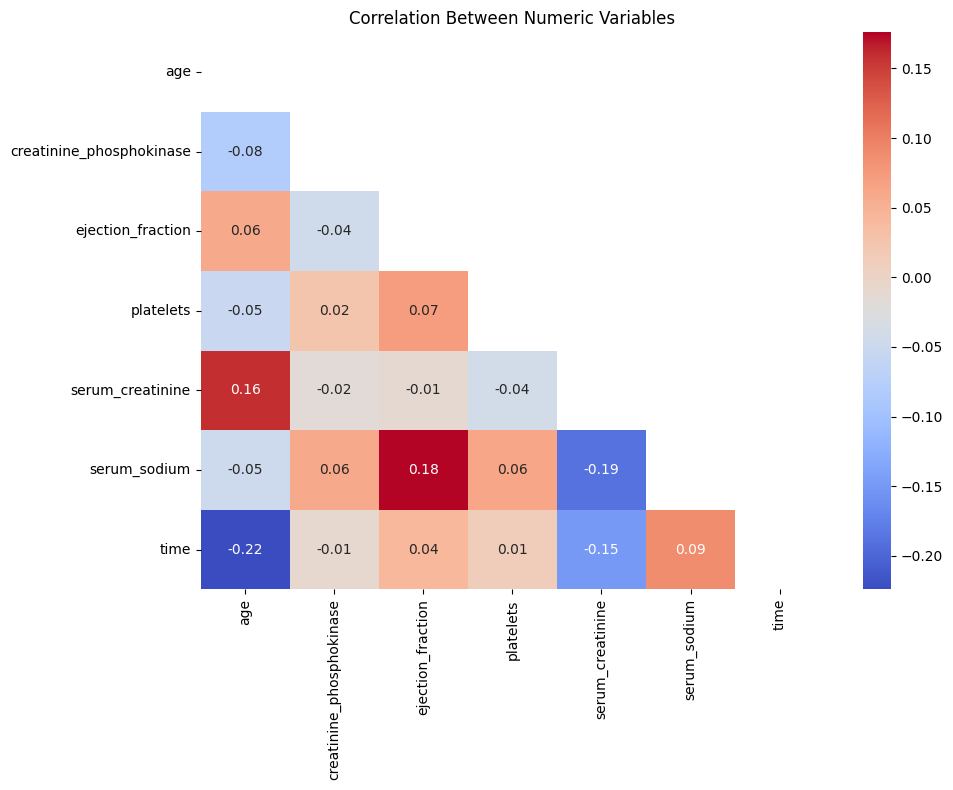

In [23]:
output_folder = "plots"
corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Correlation Between Numeric Variables")
plt.tight_layout()
filepath = os.path.join(output_folder, "correlation_matrix.png")
plt.savefig(filepath, dpi = 300, bbox_inches = "tight")
plt.show()



- There is no strong correlation between the numerich variables

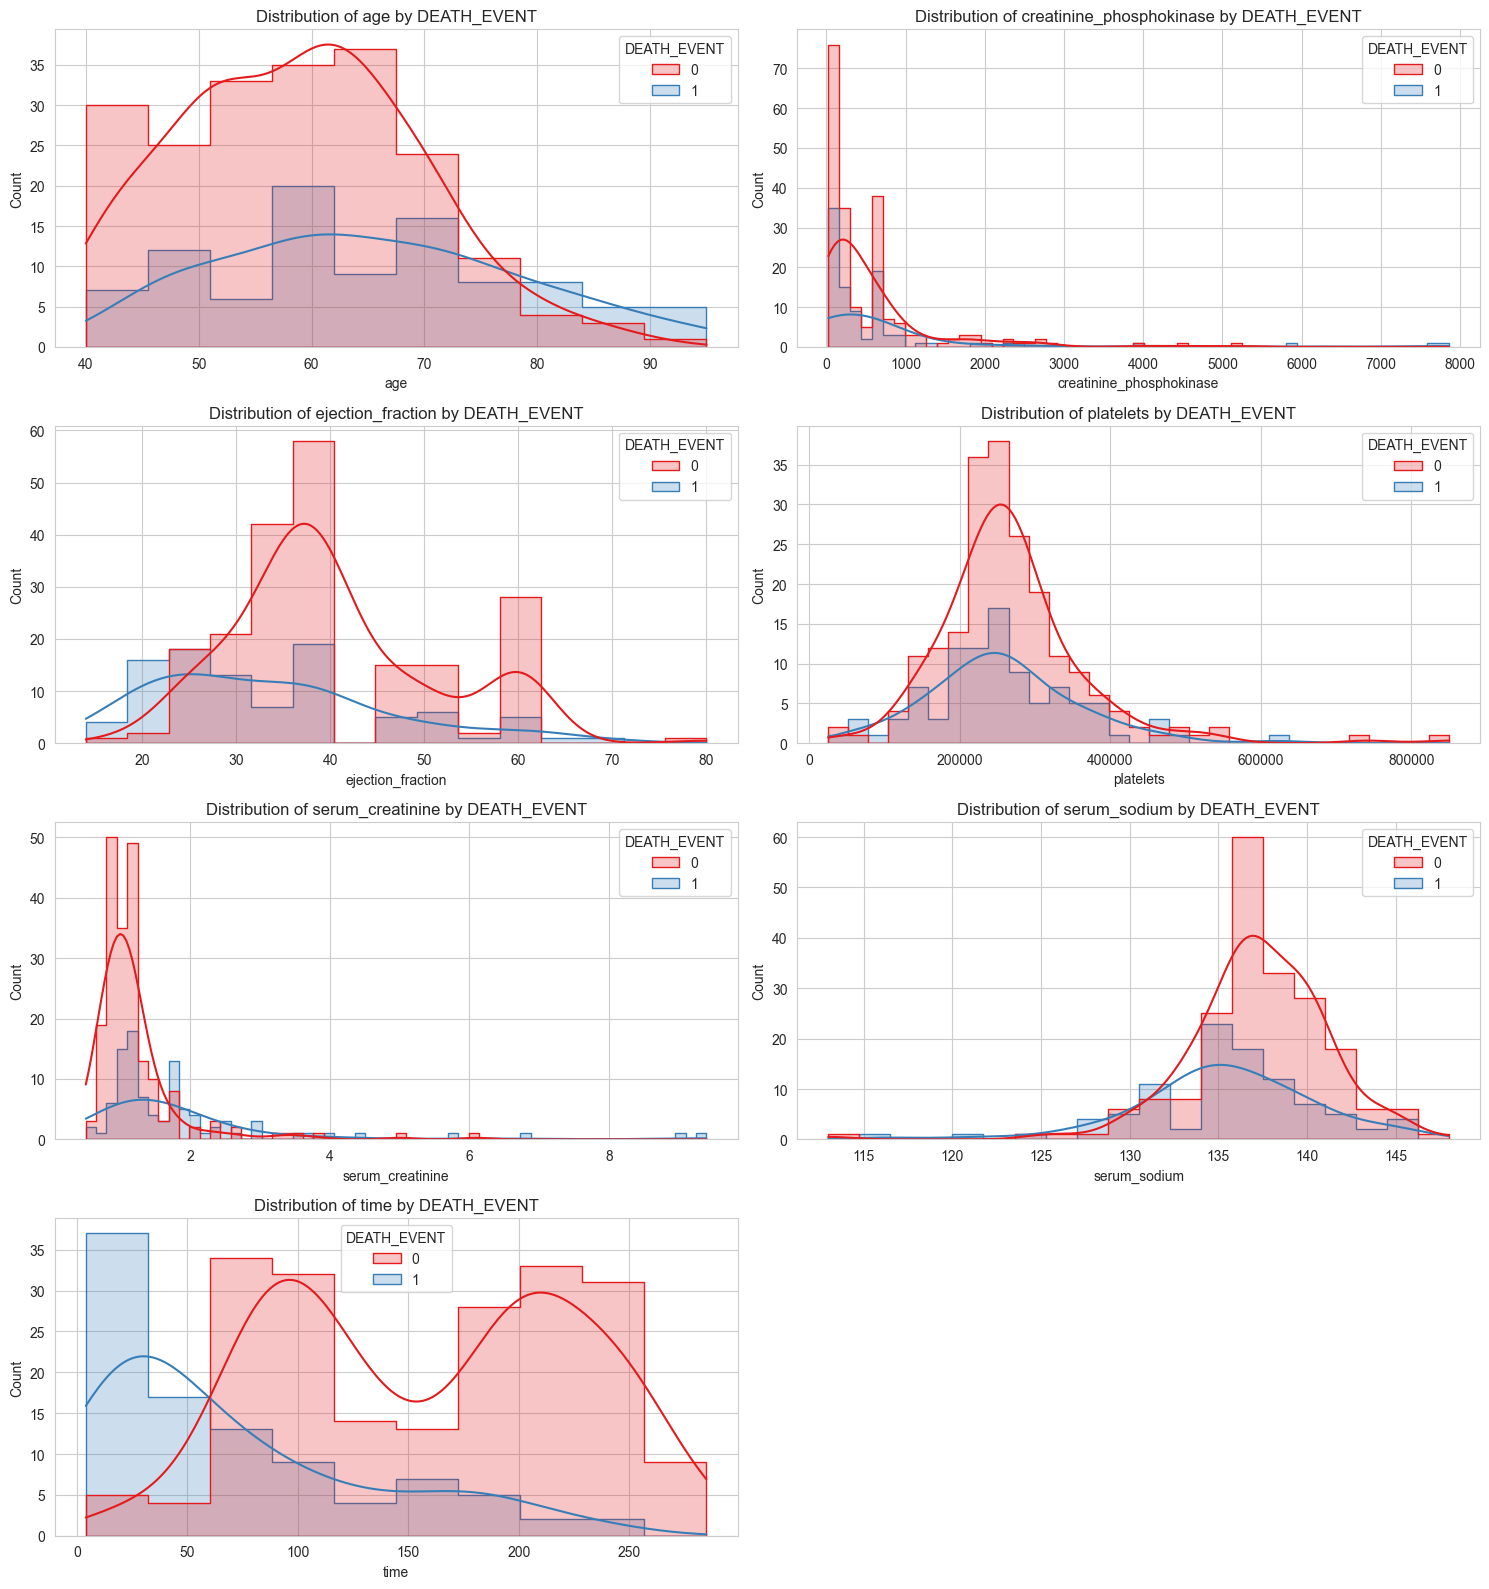

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

ouput_folder = "plots"

def plot_eda_distributions(data, target='DEATH_EVENT'):
    """
    Plot histograms with KDEs for all numerical features in the dataset,
    colored by the binary target variable.

    Parameters:
    - data: pandas DataFrame containing the dataset.
    - target: name of the binary target column to color by (default: 'DEATH_EVENT').
    """
    # Set plotting style
    sns.set_style(style="whitegrid")

    # Identify numerical columns excluding the target
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    num_features = len(numerical_cols)

    # Calculate rows and columns for subplots
    n_cols = 2
    n_rows = (num_features + 1) // n_cols

    # Create subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.histplot(data, x=col, kde=True, hue=target, ax=axes[i], palette="Set1", element="step")
        axes[i].set_title(f"Distribution of {col} by {target}")

    # Remove any extra axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    filepath = os.path.join(ouput_folder, "variables versus death event.png")
    plt.savefig(filepath, dpi = 300, bbox_inches = "tight")
    plt.show()

plot_eda_distributions(data, target='DEATH_EVENT')

In [56]:
# CATEGORICAL DATA

# chi-square for categorical features

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

X = data.iloc[:,:-1].values
X = data.select_dtypes(include=["category"])
y = data["death"]


#for chi2, features must be non-negative (usually integers)
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == "category":
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])

chi_scores = chi2(X_encoded, y)
chi_data = pd.DataFrame({"Feature":X.columns, "Chi2 score": chi_scores[0], "p_value" : chi_scores[1]})
print(chi_data.sort_values(by = "Chi2 score", ascending=False))



#### non of the features is statistically dependent from the target feature (nor numeric neither categorical)

    Feature  Chi2 score       p_value
5     death  203.000000  4.625817e-46
2       HBP    1.221539  2.690589e-01
0   anaemia    0.746593  3.875569e-01
4   smoking    0.032347  8.572686e-01
3       sex    0.001956  9.647213e-01
1  diabetes    0.000657  9.795537e-01


In [57]:
chi_scores

(array([7.46593411e-01, 6.56814450e-04, 1.22153853e+00, 1.95626598e-03,
        3.23468288e-02, 2.03000000e+02]),
 array([3.87556925e-01, 9.79553740e-01, 2.69058926e-01, 9.64721312e-01,
        8.57268569e-01, 4.62581730e-46]))

In [61]:
# Feature selection using machine learning method:

#import all the necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#split the data into the training and the test set
#the independent features were already encoded, see above 

from sklearn.model_selection import train_test_split
X = norm_data.drop("death", axis=1)
y = norm_data["death"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

# train simple linear regression
#choose a model

model = LogisticRegression()


#use RFE for feature selection
selector = RFE(model, n_features_to_select=5) #number of features is a adjustable 
selector = selector.fit(X_train, y_train)

#print the selected features
selected_features = X.columns[selector.support_]
print("Selected Features", selected_features)

#evaluate the model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

#print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.4f}")

# Accuracy is 90% which is according to me just fine


Selected Features Index(['age', 'EF', 'SC', 'sex', 'time'], dtype='object')
Accuracy with selected features: 0.9000


In [66]:
# evaluate the model 
#train the model with the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20, criterion = "entropy", random_state = 0)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

#Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with selecte features: {accuracy:.4f}")

Model Accuracy with selecte features: 0.8833


In [25]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [36]:
data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


<bound method DataFrame.info of       age anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
0    75.0       0                       582        0                 20   
1    55.0       0                      7861        0                 38   
2    65.0       0                       146        0                 20   
3    50.0       1                       111        0                 20   
4    65.0       1                       160        1                 20   
..    ...     ...                       ...      ...                ...   
294  62.0       0                        61        1                 38   
295  55.0       0                      1820        0                 38   
296  45.0       0                      2060        1                 60   
297  45.0       0                      2413        0                 38   
298  50.0       0                       196        0                 45   

    high_blood_pressure  platelets  serum_creatinine  serum_sodium 